## Import Libraby

In [1]:
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import os

2025-04-19 18:36:01.677824: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Sample Images Visualization

In [2]:
DATA_PATH = "../data/realwaste-main/RealWaste/"

In [3]:
os.listdir(DATA_PATH)

['Paper',
 '.DS_Store',
 'Metal',
 'Cardboard',
 'Textile-Trash',
 'Glass',
 'Food-Organics',
 'Vegetation',
 '.ipynb_checkpoints',
 'Plastic',
 'Miscellaneous-Trash']

In [4]:
from tabulate import tabulate

In [5]:
labels = [d for d in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, d))]

In [6]:
labels.remove('.ipynb_checkpoints')

In [7]:
labels

['Paper',
 'Metal',
 'Cardboard',
 'Textile-Trash',
 'Glass',
 'Food-Organics',
 'Vegetation',
 'Plastic',
 'Miscellaneous-Trash']

In [8]:
headers = ["waste type", "number"]
tab = []
all_img_path={}
for item in labels:
    all_img_path[item] = os.listdir(os.path.join(DATA_PATH, item))
    nb = len(all_img_path[item])
    tab.append([item, nb])

print(tabulate(tab, headers=headers, tablefmt="double_outline"))

╔═════════════════════╦══════════╗
║ waste type          ║   number ║
╠═════════════════════╬══════════╣
║ Paper               ║      500 ║
║ Metal               ║      790 ║
║ Cardboard           ║      461 ║
║ Textile-Trash       ║      319 ║
║ Glass               ║      420 ║
║ Food-Organics       ║      412 ║
║ Vegetation          ║      436 ║
║ Plastic             ║      921 ║
║ Miscellaneous-Trash ║      496 ║
╚═════════════════════╩══════════╝


In [9]:
all_img_path['Cardboard'][0]

'Cardboard_266.jpg'

In [10]:
import matplotlib.image as mpimg

In [11]:
sample_images = []

for item in labels:
    nb = len(os.listdir(os.path.join(DATA_PATH, item)))
    sample_images.append(np.random.choice(nb, 1)[0])

In [12]:
sample_images

[133, 557, 410, 137, 333, 179, 378, 408, 446]

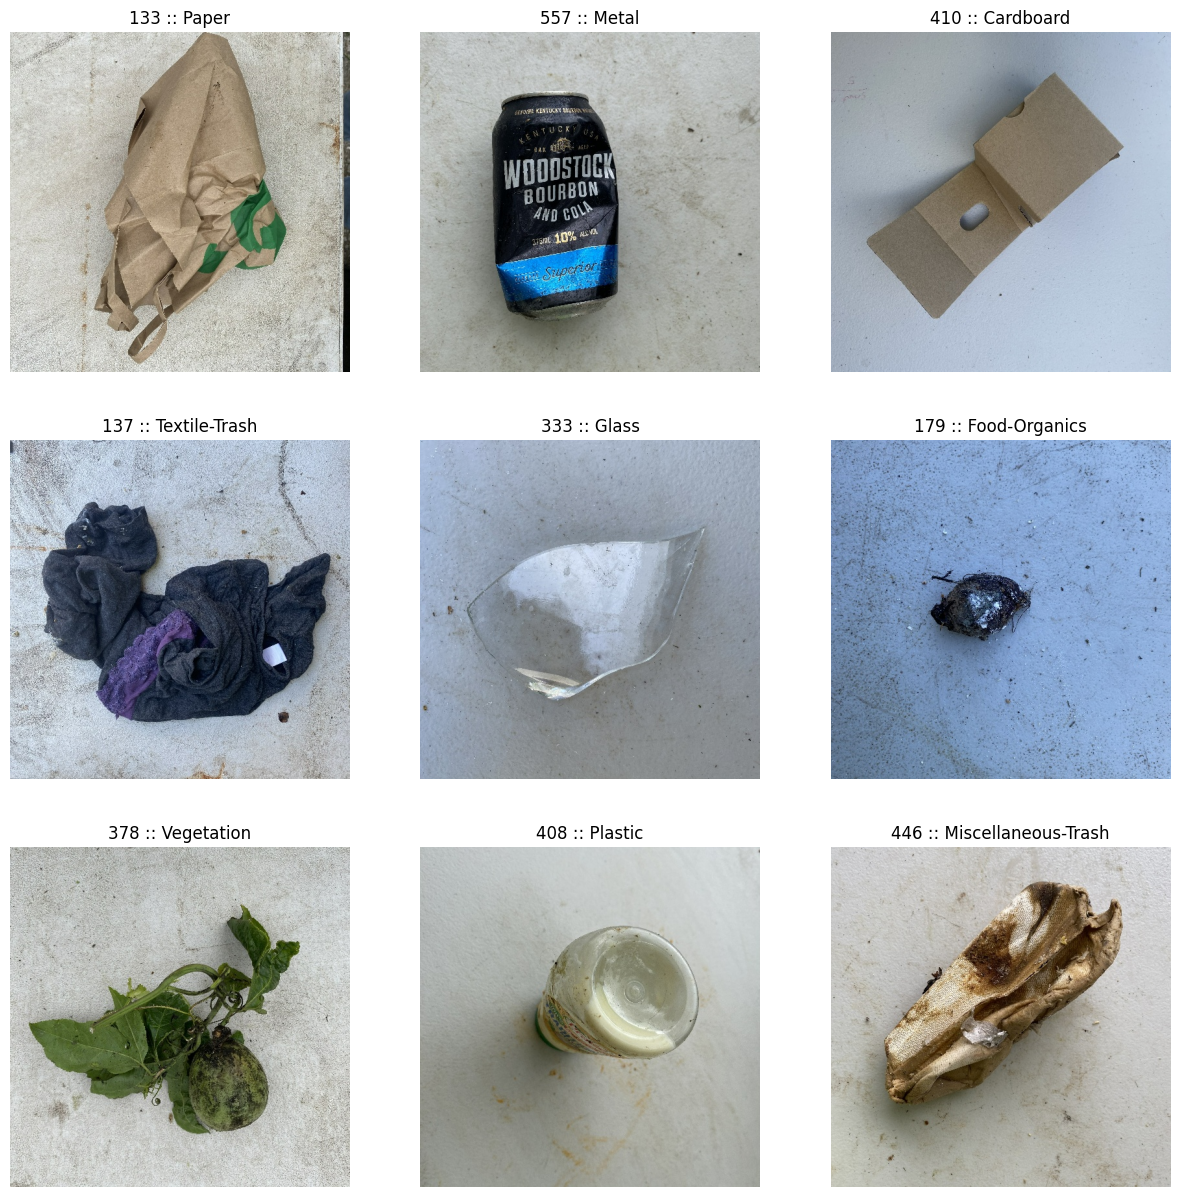

In [13]:
plt.figure(figsize=[15,15])

for i, item in enumerate(labels):
    img_path = os.path.join(DATA_PATH, item, all_img_path[item][sample_images[i]])
    img = mpimg.imread(img_path)
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{sample_images[i]} :: {item}")

plt.show()

## Split Images into Train and Test folders

In [14]:
NEW_DATA_PATH = '../data/realwaste-main/Organized'

In [15]:
from tqdm import tqdm

def TrainTest_img_split(old_path, new_path, labels = None,random_state = 0, test_size=0.3):
    if labels == None:
        class_folders = [d for d in os.listdir(old_path) if os.path.isdir(os.path.join(old_path, d))]
    else :
        class_folders = labels

    os.system(f"mkdir -p {os.path.join(new_path, "Train")}")
    os.system(f"mkdir -p {os.path.join(new_path, "Test")}")

    
    for class_name in class_folders:
        print(f"Process : {class_name}")
        os.system(f"mkdir -p {os.path.join(new_path, "train", class_name)}")
        os.system(f"mkdir -p {os.path.join(new_path, "test", class_name)}")
        
        all_class_images = os.listdir(os.path.join(old_path, class_name))
        train_img, test_img = train_test_split(all_class_images, test_size=test_size, random_state=random_state, shuffle=True)

        print("Copy train Data :")
        for img in tqdm(train_img):
            old_img_path = os.path.join(old_path, class_name, img)
            new_img_path = os.path.join(new_path, "train" ,class_name, img)
            os.system(f"cp {old_img_path} {new_img_path}")
        
        print("Copy test Data :")
        for img in tqdm(test_img):
            old_img_path = os.path.join(old_path, class_name, img)
            new_img_path = os.path.join(new_path, "test" ,class_name, img)
            os.system(f"cp {old_img_path} {new_img_path}")

In [16]:
TrainTest_img_split(old_path=DATA_PATH, new_path=NEW_DATA_PATH, labels=labels)

Process : Paper
Copy train Data :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 46.59it/s]


Copy test Data :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:03<00:00, 47.85it/s]


Process : Metal
Copy train Data :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 553/553 [00:12<00:00, 45.86it/s]


Copy test Data :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 237/237 [00:05<00:00, 43.97it/s]


Process : Cardboard
Copy train Data :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 322/322 [00:07<00:00, 45.18it/s]


Copy test Data :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 139/139 [00:03<00:00, 44.50it/s]


Process : Textile-Trash
Copy train Data :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 223/223 [00:04<00:00, 45.68it/s]


Copy test Data :


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:02<00:00, 46.48it/s]


Process : Glass
Copy train Data :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 294/294 [00:06<00:00, 45.87it/s]


Copy test Data :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 126/126 [00:02<00:00, 46.93it/s]


Process : Food-Organics
Copy train Data :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 288/288 [00:06<00:00, 46.23it/s]


Copy test Data :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 124/124 [00:02<00:00, 45.39it/s]


Process : Vegetation
Copy train Data :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 305/305 [00:06<00:00, 44.90it/s]


Copy test Data :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 131/131 [00:02<00:00, 46.50it/s]


Process : Plastic
Copy train Data :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 644/644 [00:14<00:00, 45.74it/s]


Copy test Data :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 277/277 [00:05<00:00, 46.56it/s]


Process : Miscellaneous-Trash
Copy train Data :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 347/347 [00:07<00:00, 46.04it/s]


Copy test Data :


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 149/149 [00:03<00:00, 45.49it/s]


## Load Data : ImageDataGenerator

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
train_img_generator = ImageDataGenerator(rescale=1/255.0)
test_img_generator = ImageDataGenerator(rescale=1/255.0)

In [37]:
train_data = train_img_generator.flow_from_directory(directory=os.path.join(NEW_DATA_PATH,"Train"), class_mode='categorical', batch_size=100)
test_data = test_img_generator.flow_from_directory(directory=os.path.join(NEW_DATA_PATH,"Test"), class_mode='categorical', batch_size=100)

Found 3324 images belonging to 9 classes.
Found 1428 images belonging to 9 classes.


## Model CNN

### Create Model

In [42]:
model_cnn1 = Sequential([

    #Input layer
    layers.Input(shape=(256, 256, 3)),
    
    #features extraction
    layers.Conv2D(kernel_size=(3,3), filters=32, activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(kernel_size=(3,3), filters=64, activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(kernel_size=(3,3), filters=128, activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),

    #Flatten layer
    layers.Flatten(),
    
    #Fully connected layer
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=len(labels), activation='softmax')
])

In [43]:
model_cnn1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │     7,372,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,466,697 (28.48 MB)

 Trainable params: 7,466,697 (28.48 MB)

 Non-trainable params: 0 (0.00 B)

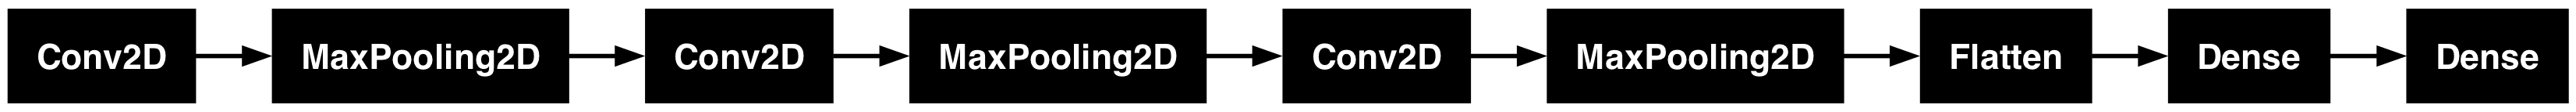

In [44]:
plot_model(model_cnn1, to_file="realwaste_model_cnn1.png", rankdir="LR")

### Compilation

In [45]:
model_cnn1.compile(loss='categorical_crossentropy', 
                   optimizer='adam', 
                   metrics=['accuracy'])

### Callbacks

In [46]:
stop = callbacks.EarlyStopping(patience=3, monitor='val_accuracy')
check_point = callbacks.ModelCheckpoint(filepath="../data/checkpoint/realwaste_model_cnn1.keras", monitor='val_accuracy', save_best_only=True)

### Model training 

In [47]:
BATCH_SIZE = 32
EPOCHS = 100

In [48]:
model_cnn1.fit(train_data, batch_size=BATCH_SIZE, 
               epochs=EPOCHS, validation_data=test_data, 
               callbacks=[stop, check_point])

/Users/macbookpro/miniforge3/envs/tensorflow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.1870 - loss: 2.7295 - val_accuracy: 0.3116 - val_loss: 1.8827
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.3618 - loss: 1.7472 - val_accuracy: 0.4237 - val_loss: 1.6586
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 154s 5s/step - accuracy: 0.4643 - loss: 1.5034 - val_accuracy: 0.4622 - val_loss: 1.4774
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 150s 4s/step - accuracy: 0.5562 - loss: 1.2933 - val_accuracy: 0.4762 - val_loss: 1.4488
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step - accuracy: 0.6298 - loss: 1.0906 - val_accuracy: 0.5427 - val_loss: 1.2786
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.6997 - loss: 0.8770 - val_accuracy: 0.5378 - val_loss: 1.3347
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.7430 - loss: 0.7673 - val_accuracy: 0.6134 - val_loss: 1.2007
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.8358 - loss: 0.5062 - val_accuracy: 0.

### Training evaluation

<function matplotlib.pyplot.show(close=None, block=None)>

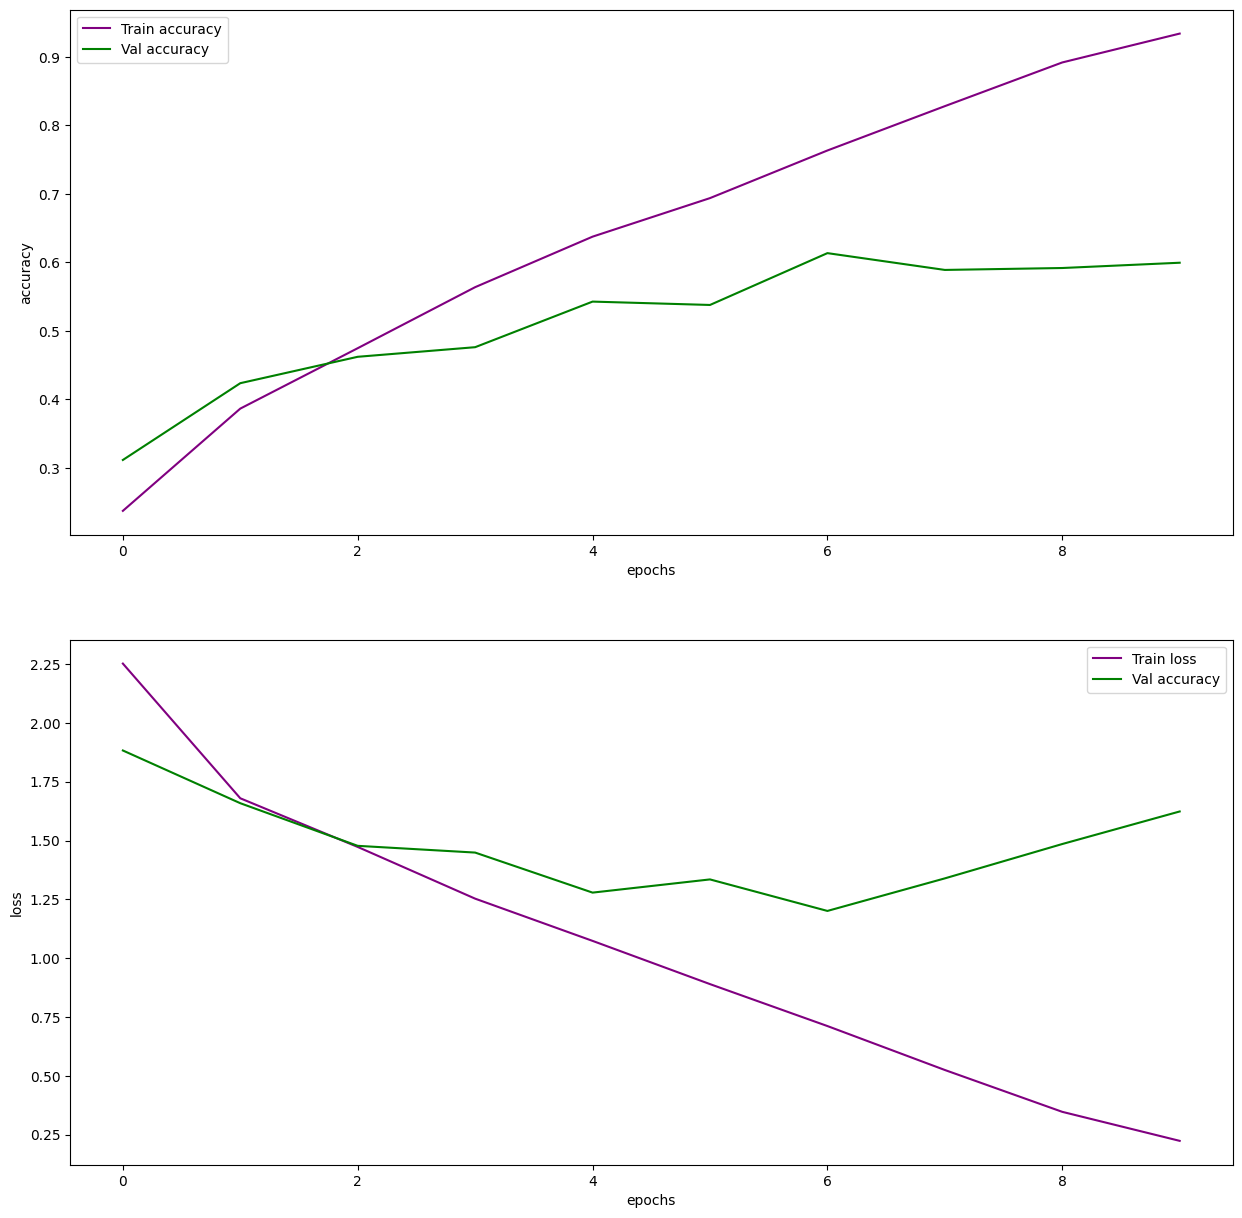

In [49]:
hist = model_cnn1.history.history

plt.figure(figsize=[15,15])

plt.subplot(2,1,1)
plt.plot(hist['accuracy'], label='Train accuracy', color='purple')
plt.plot(hist['val_accuracy'], label='Val accuracy', color='green')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()

plt.subplot(2,1,2)
plt.plot(hist['loss'], label='Train loss', color='purple')
plt.plot(hist['val_loss'], label='Val accuracy', color='green')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

plt.show

### Test model

In [50]:
model_cnn1.load_weights('../data/checkpoint/realwaste_model_cnn1.keras')

In [150]:
test_img_generator = ImageDataGenerator(rescale=1/255.0)
test_data = test_img_generator.flow_from_directory(os.path.join(NEW_DATA_PATH, "Test"),
                                                   target_size=(256, 256), 
                                                   batch_size=1, 
                                                   shuffle=False,)

Found 1428 images belonging to 9 classes.


In [151]:
y_hat = model_cnn1.predict(test_data)

y_hat = np.argmax(y_hat, axis=1)

1428/1428 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step


In [152]:
labels = np.sort(labels)

In [153]:
labels

array(['Cardboard', 'Food-Organics', 'Glass', 'Metal',
       'Miscellaneous-Trash', 'Paper', 'Plastic', 'Textile-Trash',
       'Vegetation'], dtype='<U19')

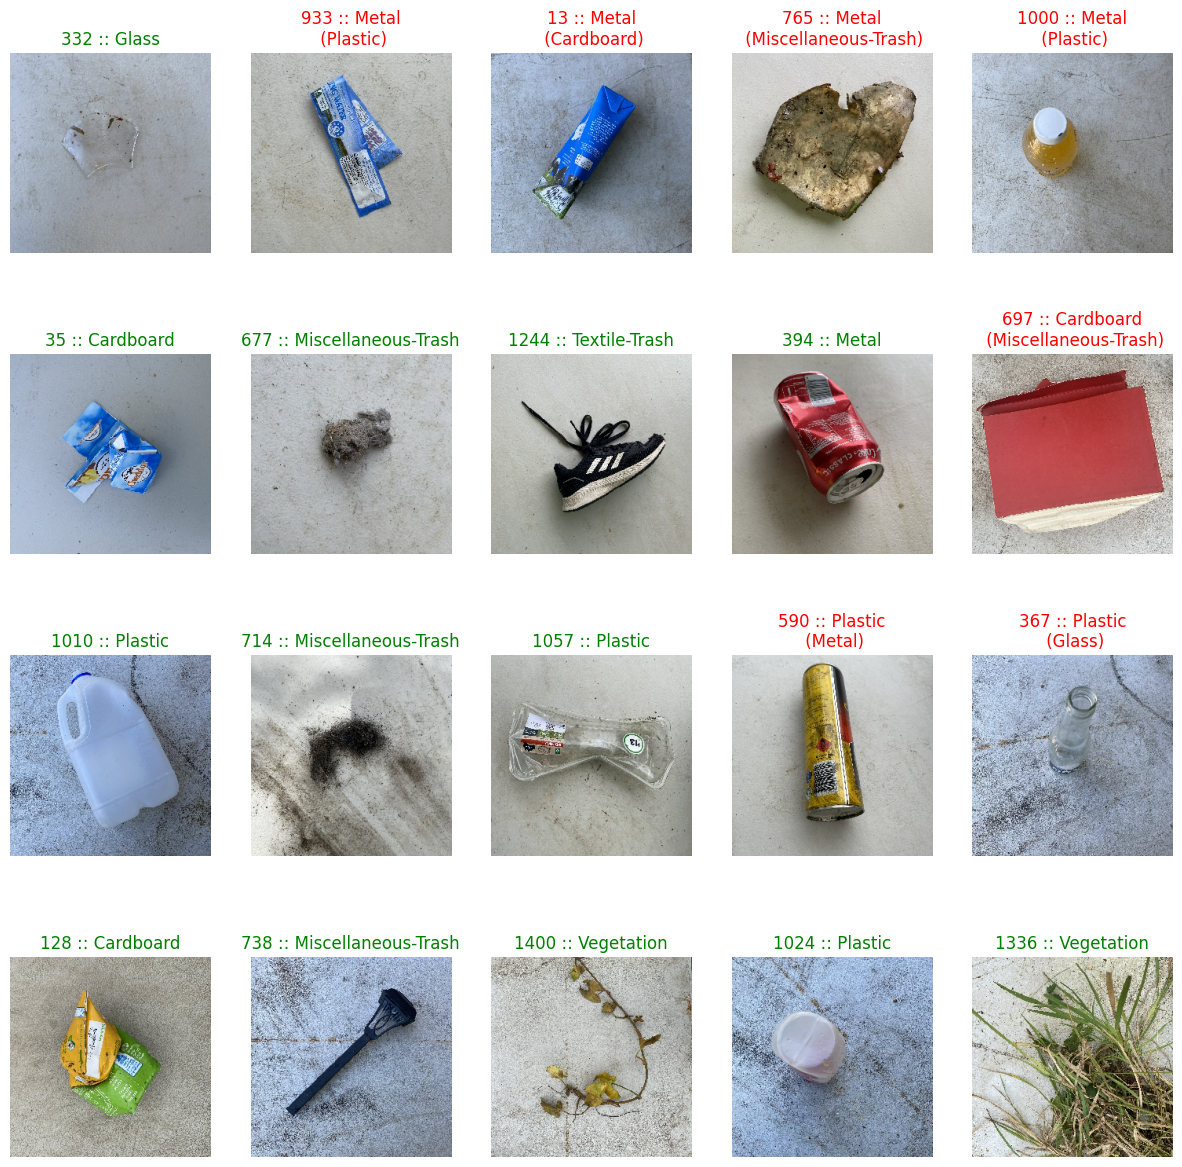

In [154]:
img_idx = np.random.choice(test_data.samples, 20)
Y_test = test_data.labels

plt.figure(figsize=[15,15])
for i, idx in enumerate(img_idx):
    plt.subplot(4,5,i+1)
    if y_hat[idx] == Y_test[idx]:
        col = 'green'
        title = f"{idx} :: {labels[y_hat[idx]]}"
    else:
        col = 'red'
        title = f"{idx} :: {labels[y_hat[idx]]}\n ({labels[Y_test[idx]]})"
    img, _ = test_data[idx]
    plt.imshow(img.reshape(256,256,3))
    plt.title(title, color = col)
    plt.axis('off')

plt.show()

In [155]:
print(f"Accuracy Test : {100*np.sum(y_hat == Y_test)/len(Y_test):.3f}%")

Accuracy Test : 61.345%


### Classification report

In [156]:
print(classification_report(Y_test, y_hat, target_names=labels, zero_division=0,digits=3))

                     precision    recall  f1-score   support

          Cardboard      0.621     0.518     0.565       139
      Food-Organics      0.717     0.839     0.773       124
              Glass      0.888     0.627     0.735       126
              Metal      0.505     0.692     0.584       237
Miscellaneous-Trash      0.442     0.466     0.454       148
              Paper      0.667     0.507     0.576       150
            Plastic      0.653     0.556     0.600       277
      Textile-Trash      0.451     0.479     0.465        96
         Vegetation      0.772     0.855     0.812       131

           accuracy                          0.613      1428
          macro avg      0.635     0.615     0.618      1428
       weighted avg      0.628     0.613     0.613      1428



## Data Augmentation

### Load Data

In [58]:
train_img_generator = ImageDataGenerator(rescale=1/255.0,rotation_range=40, width_shift_range=0.2, 
                                         height_shift_range=0.2, shear_range=0.2, zoom_range=0.3, horizontal_flip=True, 
                                        vertical_flip=True, fill_mode='nearest')
test_img_generator = ImageDataGenerator(rescale=1/255.0)

In [59]:
train_data = train_img_generator.flow_from_directory(directory=os.path.join(NEW_DATA_PATH,"Train"), class_mode='categorical', batch_size=100)
test_data = test_img_generator.flow_from_directory(directory=os.path.join(NEW_DATA_PATH,"Test"), class_mode='categorical', batch_size=100)

Found 3324 images belonging to 9 classes.
Found 1428 images belonging to 9 classes.


### Create Model

In [60]:
model_cnn2 = Sequential([

    #Input layer
    layers.Input(shape=(256, 256, 3)),
    
    #features extraction
    layers.Conv2D(kernel_size=(3,3), filters=32, activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(kernel_size=(3,3), filters=64, activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(kernel_size=(3,3), filters=128, activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),

    #Flatten layer
    layers.Flatten(),
    
    #Fully connected layer
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=len(labels), activation='softmax')
])

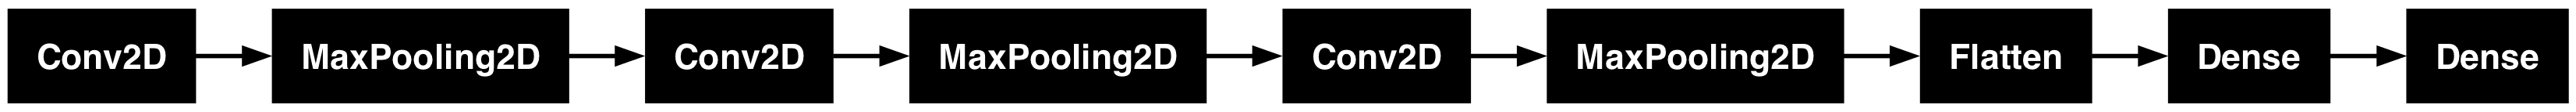

In [63]:
plot_model(model_cnn2, to_file="realwaste_model_cnn2.png", rankdir="LR")

### Compilation

In [61]:
model_cnn2.compile(loss='categorical_crossentropy', 
                   optimizer='rmsprop', 
                   metrics=['accuracy'])

### Callbacks

In [64]:
stop = callbacks.EarlyStopping(patience=3, monitor='val_accuracy')
check_point = callbacks.ModelCheckpoint(filepath="../data/checkpoint/realwaste_model_cnn2.keras", monitor='val_accuracy', save_best_only=True)

### Model Training

In [65]:
model_cnn2.fit(train_data, batch_size=BATCH_SIZE, 
               epochs=EPOCHS, validation_data=test_data, 
               callbacks=[stop, check_point])

/Users/macbookpro/miniforge3/envs/tensorflow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 163s 5s/step - accuracy: 0.1607 - loss: 2.9744 - val_accuracy: 0.2458 - val_loss: 2.1079
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.2222 - loss: 2.0989 - val_accuracy: 0.2766 - val_loss: 2.0049
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.2621 - loss: 2.0503 - val_accuracy: 0.3193 - val_loss: 1.8926
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 151s 5s/step - accuracy: 0.3004 - loss: 1.9503 - val_accuracy: 0.3284 - val_loss: 1.9618
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 148s 4s/step - accuracy: 0.3400 - loss: 1.8151 - val_accuracy: 0.3438 - val_loss: 2.0202
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 150s 4s/step - accuracy: 0.3729 - loss: 1.7078 - val_accuracy: 0.4013 - val_loss: 1.8722
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 166s 5s/step - accuracy: 0.4041 - loss: 1.6599 - val_accuracy: 0.3775 - val_loss: 1.9172
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 163s 5s/step - accuracy: 0.4216 - loss: 1.6210 - val_accuracy: 0.

### Training evaluation

<function matplotlib.pyplot.show(close=None, block=None)>

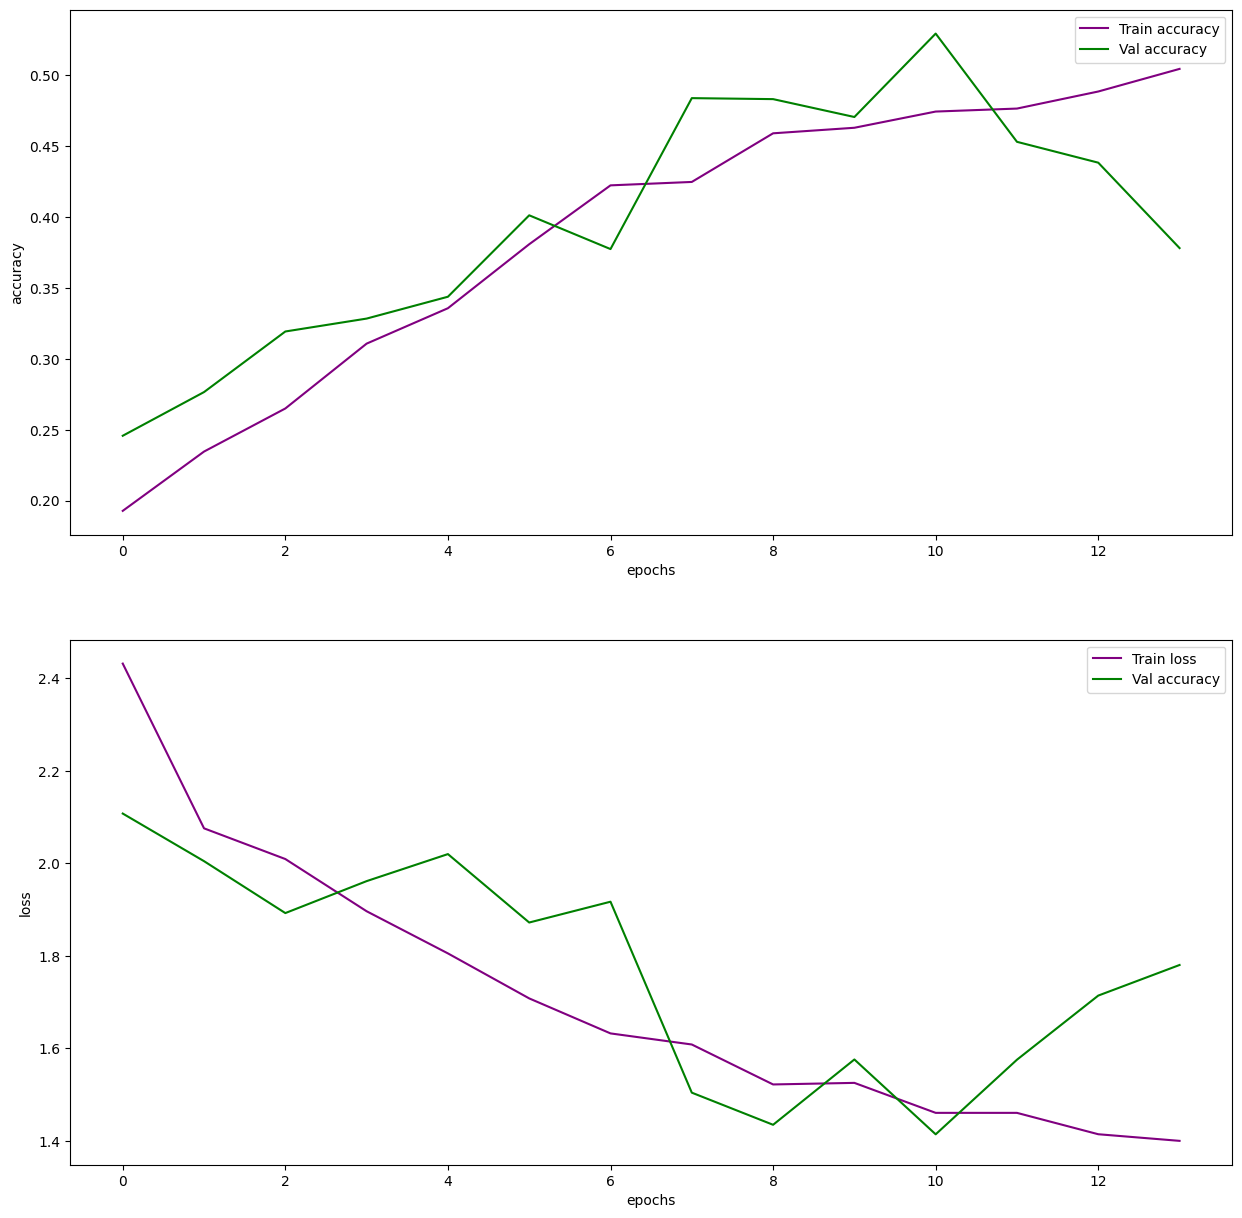

In [66]:
hist = model_cnn2.history.history

plt.figure(figsize=[15,15])

plt.subplot(2,1,1)
plt.plot(hist['accuracy'], label='Train accuracy', color='purple')
plt.plot(hist['val_accuracy'], label='Val accuracy', color='green')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()

plt.subplot(2,1,2)
plt.plot(hist['loss'], label='Train loss', color='purple')
plt.plot(hist['val_loss'], label='Val accuracy', color='green')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

plt.show

In [72]:
model_cnn2.load_weights('checkpoint/realwaste_model_cnn2.keras')

In [148]:
test_img_generator = ImageDataGenerator(rescale=1/255.0)
test_data = test_img_generator.flow_from_directory(os.path.join(NEW_DATA_PATH, "Test"),
                                                   target_size=(256, 256), 
                                                   batch_size=1, 
                                                   shuffle=False,)

Found 1428 images belonging to 9 classes.


In [157]:
y_hat = model_cnn2.predict(test_data)

y_hat = np.argmax(y_hat, axis=1)

1428/1428 ━━━━━━━━━━━━━━━━━━━━ 38s 27ms/step


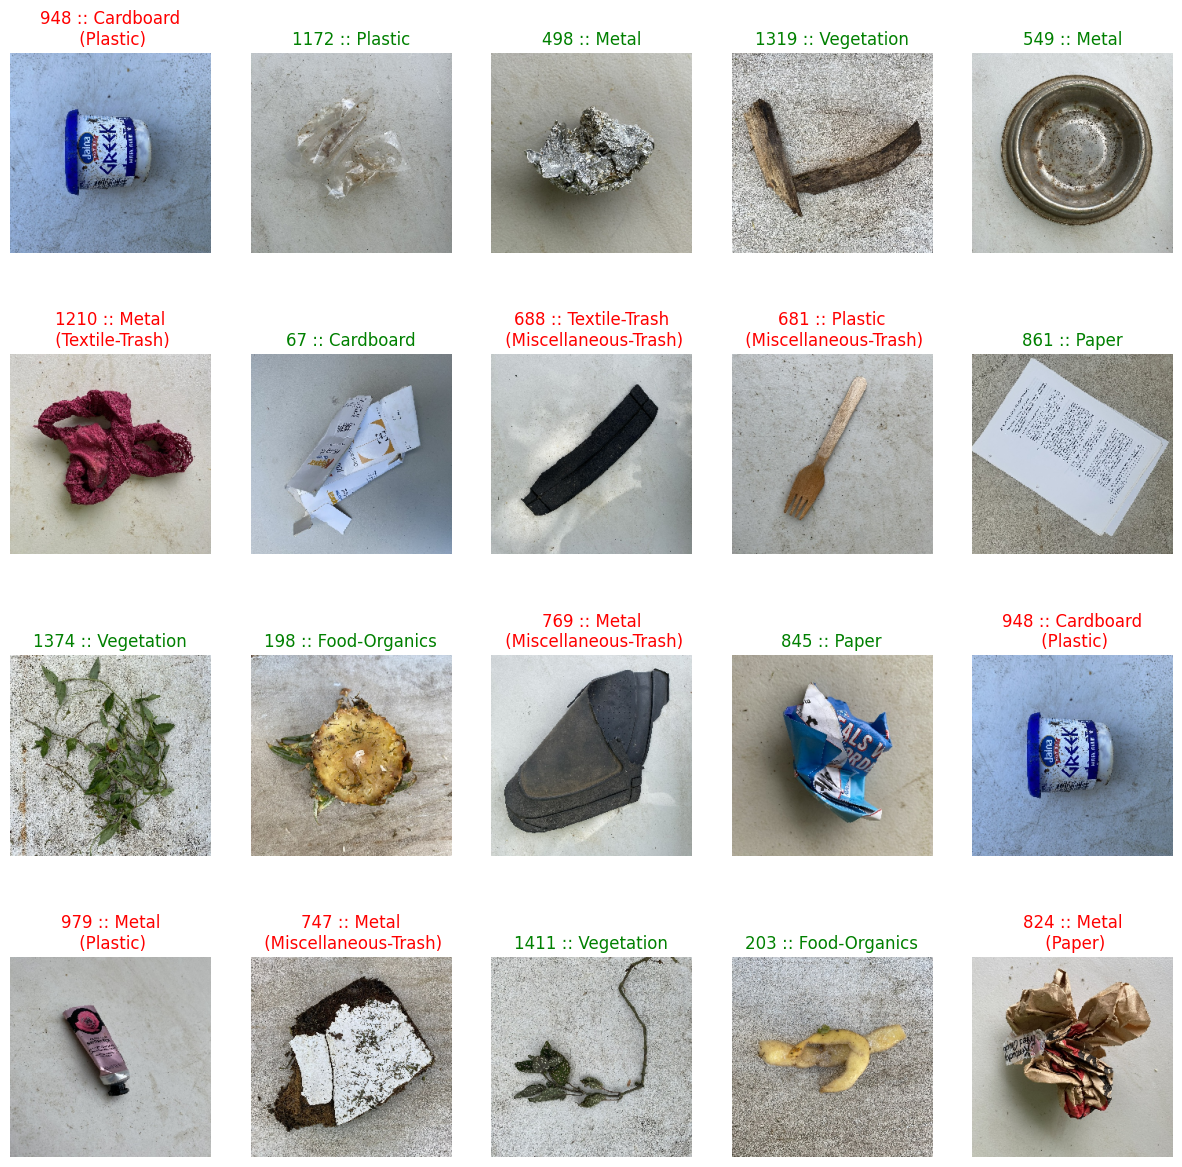

In [158]:
img_idx = np.random.choice(test_data.samples, 20)
Y_test = test_data.labels

plt.figure(figsize=[15,15])
for i, idx in enumerate(img_idx):
    plt.subplot(4,5,i+1)
    if y_hat[idx] == Y_test[idx]:
        col = 'green'
        title = f"{idx} :: {labels[y_hat[idx]]}"
    else:
        col = 'red'
        title = f"{idx} :: {labels[y_hat[idx]]}\n ({labels[Y_test[idx]]})"
    img, _ = test_data[idx]
    plt.imshow(img.reshape(256,256,3))
    plt.title(title, color = col)
    plt.axis('off')

plt.show()

In [159]:
print(f"Accuracy Test : {100*np.sum(y_hat == Y_test)/len(Y_test):.3f}%")

Accuracy Test : 52.941%


In [160]:
print(classification_report(Y_test, y_hat, target_names=labels, zero_division=0,digits=3))

                     precision    recall  f1-score   support

          Cardboard      0.424     0.662     0.517       139
      Food-Organics      0.537     0.694     0.606       124
              Glass      0.792     0.484     0.601       126
              Metal      0.464     0.797     0.587       237
Miscellaneous-Trash      0.226     0.047     0.078       148
              Paper      0.525     0.487     0.505       150
            Plastic      0.543     0.412     0.468       277
      Textile-Trash      0.632     0.250     0.358        96
         Vegetation      0.738     0.840     0.786       131

           accuracy                          0.529      1428
          macro avg      0.542     0.519     0.501      1428
       weighted avg      0.529     0.529     0.501      1428



## Transfert Learning

### Load Data

In [109]:
train_data_generator = ImageDataGenerator(rescale=1/255.0)
valid_data_generator = ImageDataGenerator(rescale=1/255.0)

In [110]:
train_data = train_data_generator.flow_from_directory(os.path.join(NEW_DATA_PATH,"Train"),target_size=(224, 224), batch_size=100)
test_data = valid_data_generator.flow_from_directory(os.path.join(NEW_DATA_PATH, "Test"),target_size=(224, 224), batch_size=100)

Found 3324 images belonging to 9 classes.
Found 1428 images belonging to 9 classes.


### Create Model with functional API

In [84]:
from tensorflow.keras.applications import vgg16

In [88]:
pretrained_model_vgg16 = vgg16.VGG16(include_top=False, weights='imagenet',input_shape=(224, 224,3))

In [89]:
pretrained_model_vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [94]:
pretrained_model_vgg16.trainable=False

In [103]:
from livelossplot import PlotLossesKeras

In [95]:
from tensorflow.keras import Model

In [111]:
inputs = layers.Input(shape=(224,224,3))
x = pretrained_model_vgg16(inputs)
x = layers.Flatten()(x)
x = layers.Dense(units=128, activation='relu')(x)
x = layers.Dense(units=64, activation='relu')(x)
outputs = layers.Dense(units=len(labels), activation='softmax')(x)

model_cnn3 = Model(inputs, outputs)

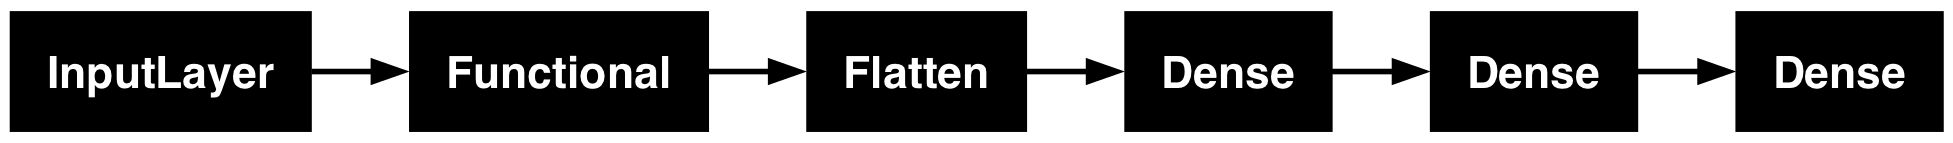

In [112]:
plot_model(model_cnn3, 'model_cnn3.png', rankdir="LR")

In [113]:
model_cnn3.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,934,921 (68.42 MB)

 Trainable params: 3,220,233 (12.28 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

### Compilation

In [114]:
model_cnn3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='rmsprop')

### Callbacks

In [115]:
stop = callbacks.EarlyStopping(patience=3, monitor='val_accuracy')
check_point = callbacks.ModelCheckpoint(filepath="../data/checkpoint/realwaste_model_cnn3.keras", monitor='val_accuracy', save_best_only=True)

### Training

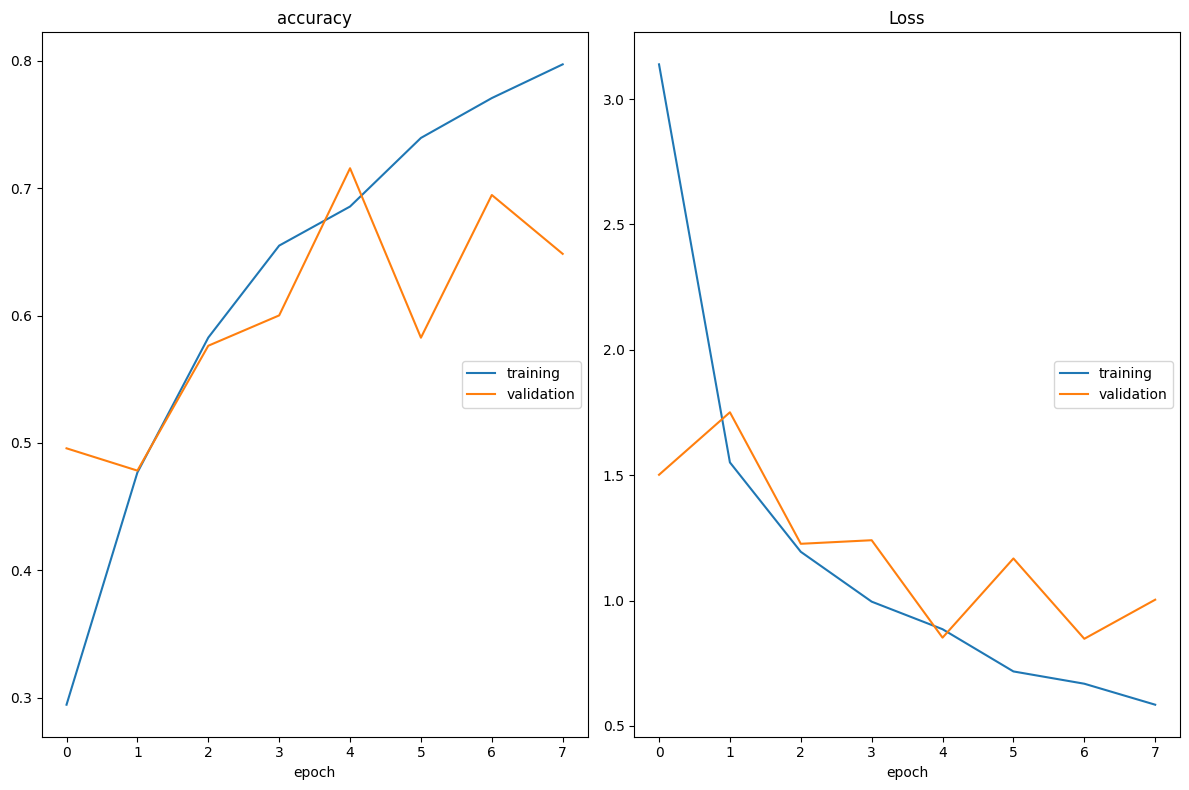

accuracy
	training         	 (min:    0.295, max:    0.797, cur:    0.797)
	validation       	 (min:    0.478, max:    0.716, cur:    0.648)
Loss
	training         	 (min:    0.584, max:    3.139, cur:    0.584)
	validation       	 (min:    0.847, max:    1.751, cur:    1.003)
34/34 ━━━━━━━━━━━━━━━━━━━━ 606s 18s/step - accuracy: 0.7933 - loss: 0.6010 - val_accuracy: 0.6485 - val_loss: 1.0032
CPU times: user 14h 20min 29s, sys: 33min 19s, total: 14h 53min 48s
Wall time: 1h 28min 16s


In [116]:
%%time

model_cnn3.fit(train_data, batch_size=100, 
               epochs=EPOCHS, validation_data=test_data, 
               callbacks=[stop, check_point, PlotLossesKeras()], verbose=True)

### Test model

In [162]:
test_img_generator = ImageDataGenerator(rescale=1/255.0)
test_data = test_img_generator.flow_from_directory(os.path.join(NEW_DATA_PATH, "Test"),
                                                   target_size=(224, 224), 
                                                   batch_size=1, 
                                                   shuffle=False,)

Found 1428 images belonging to 9 classes.


In [137]:
y_hat = [np.argmax(y) for y in model_cnn3.predict(test_data)]

/Users/macbookpro/miniforge3/envs/tensorflow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1428/1428 ━━━━━━━━━━━━━━━━━━━━ 222s 156ms/step


In [138]:
Y_test = test_data.labels

In [139]:
print(f"Accuracy Test : {100*np.sum(y_hat == Y_test)/len(Y_test):.3f}%")

Accuracy Test : 71.569%


In [140]:
np.sum(y_hat == Y_test)

1022

In [141]:
y_hat[:10]

[0, 4, 4, 6, 0, 0, 0, 6, 4, 4]

In [142]:
Y_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [143]:
model_cnn3.load_weights('checkpoint/realwaste_model_cnn3.keras')

In [163]:
y_hat = [np.argmax(y) for y in model_cnn3.predict(test_data)]

/Users/macbookpro/miniforge3/envs/tensorflow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1428/1428 ━━━━━━━━━━━━━━━━━━━━ 239s 167ms/step


In [164]:
print(f"Accuracy Test : {100*np.sum(y_hat == Y_test)/len(Y_test):.3f}%")

Accuracy Test : 71.569%


### Classificattion report 

In [165]:
print(classification_report(Y_test, y_hat, target_names=labels, zero_division=0,digits=3))

                     precision    recall  f1-score   support

          Cardboard      0.781     0.590     0.672       139
      Food-Organics      0.729     0.911     0.810       124
              Glass      0.785     0.810     0.797       126
              Metal      0.649     0.789     0.712       237
Miscellaneous-Trash      0.556     0.473     0.511       148
              Paper      0.863     0.587     0.698       150
            Plastic      0.730     0.675     0.702       277
      Textile-Trash      0.544     0.844     0.661        96
         Vegetation      0.957     0.855     0.903       131

           accuracy                          0.716      1428
          macro avg      0.733     0.726     0.719      1428
       weighted avg      0.731     0.716     0.714      1428



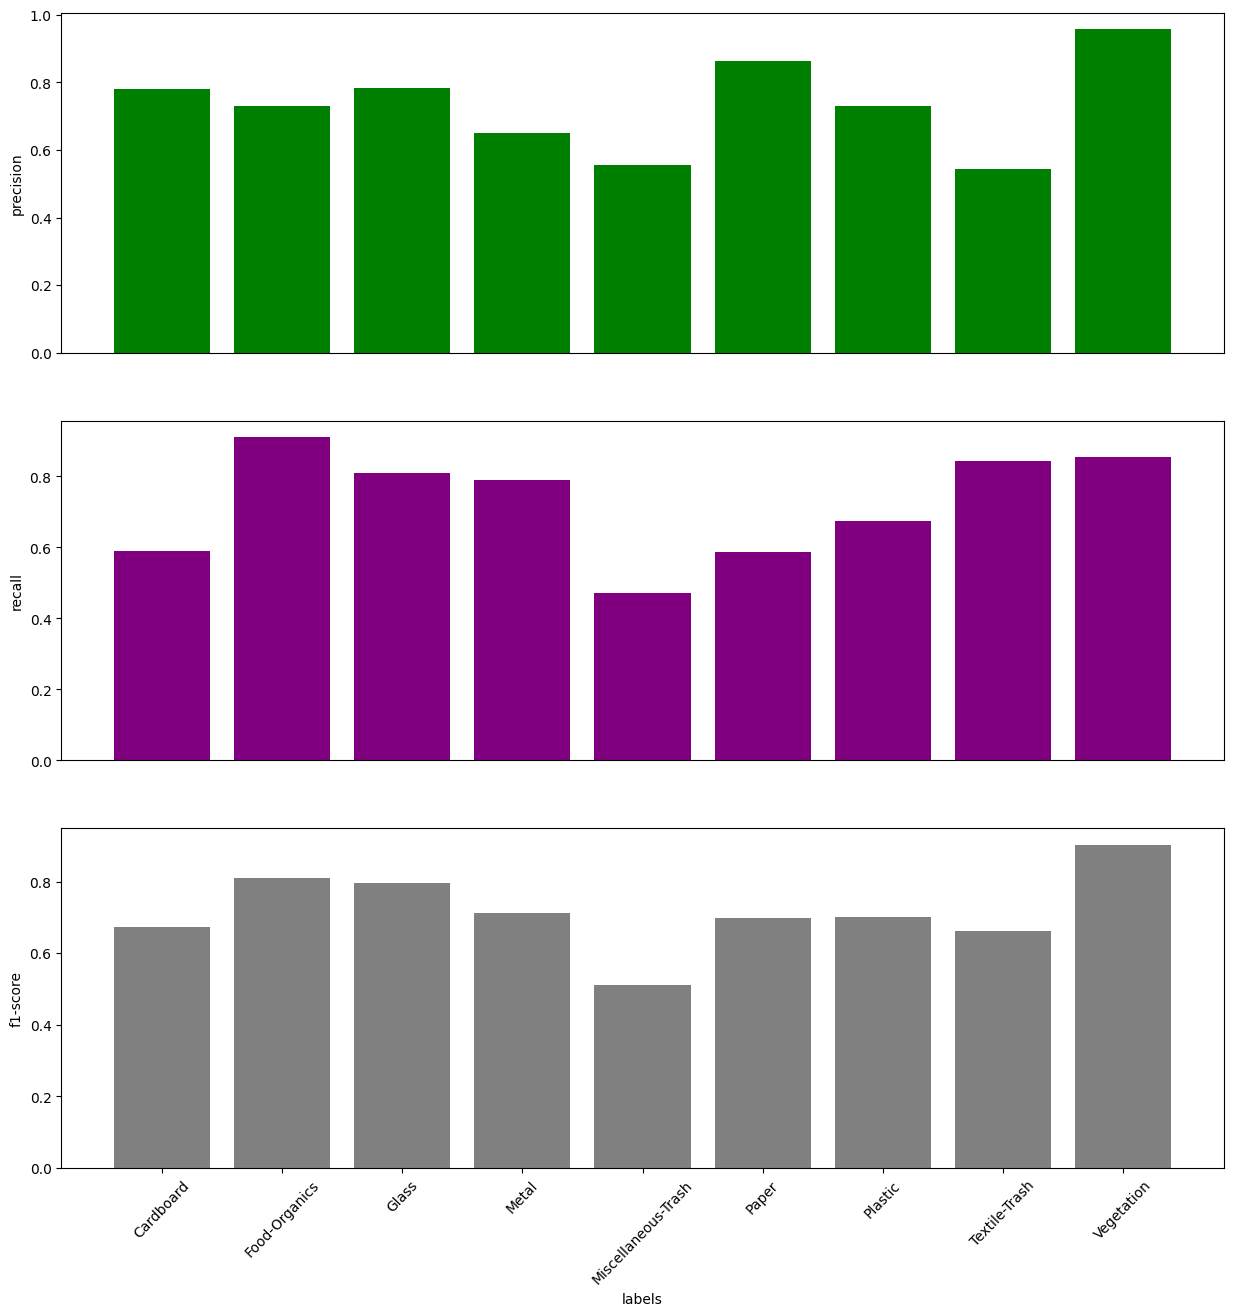

In [166]:
reports = classification_report(Y_test, y_hat, target_names=labels, zero_division=0, output_dict=True)

precision = []
recall = []
f1_score = []

for key in labels:
    precision.append(reports[key]['precision'])
    recall.append(reports[key]['recall'])
    f1_score.append(reports[key]['f1-score'])


plt.figure(figsize=[15,15])

plt.subplot(3,1,1)
plt.bar(x=labels, height=precision, color = 'green')
plt.xticks(rotation = 45)
plt.ylabel('precision')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,2)
plt.bar(x=labels, height=recall, color = 'purple')
plt.xticks(rotation = 45)
plt.ylabel('recall')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,3)
plt.bar(x=labels, height=f1_score, color = 'gray')
plt.xticks(rotation = 46)
plt.ylabel('f1-score')
plt.xlabel('labels')

plt.show()

In [167]:
from sklearn.metrics import confusion_matrix

In [179]:
matrix = confusion_matrix(Y_test, y_hat, normalize='true')

In [180]:
import seaborn as sns

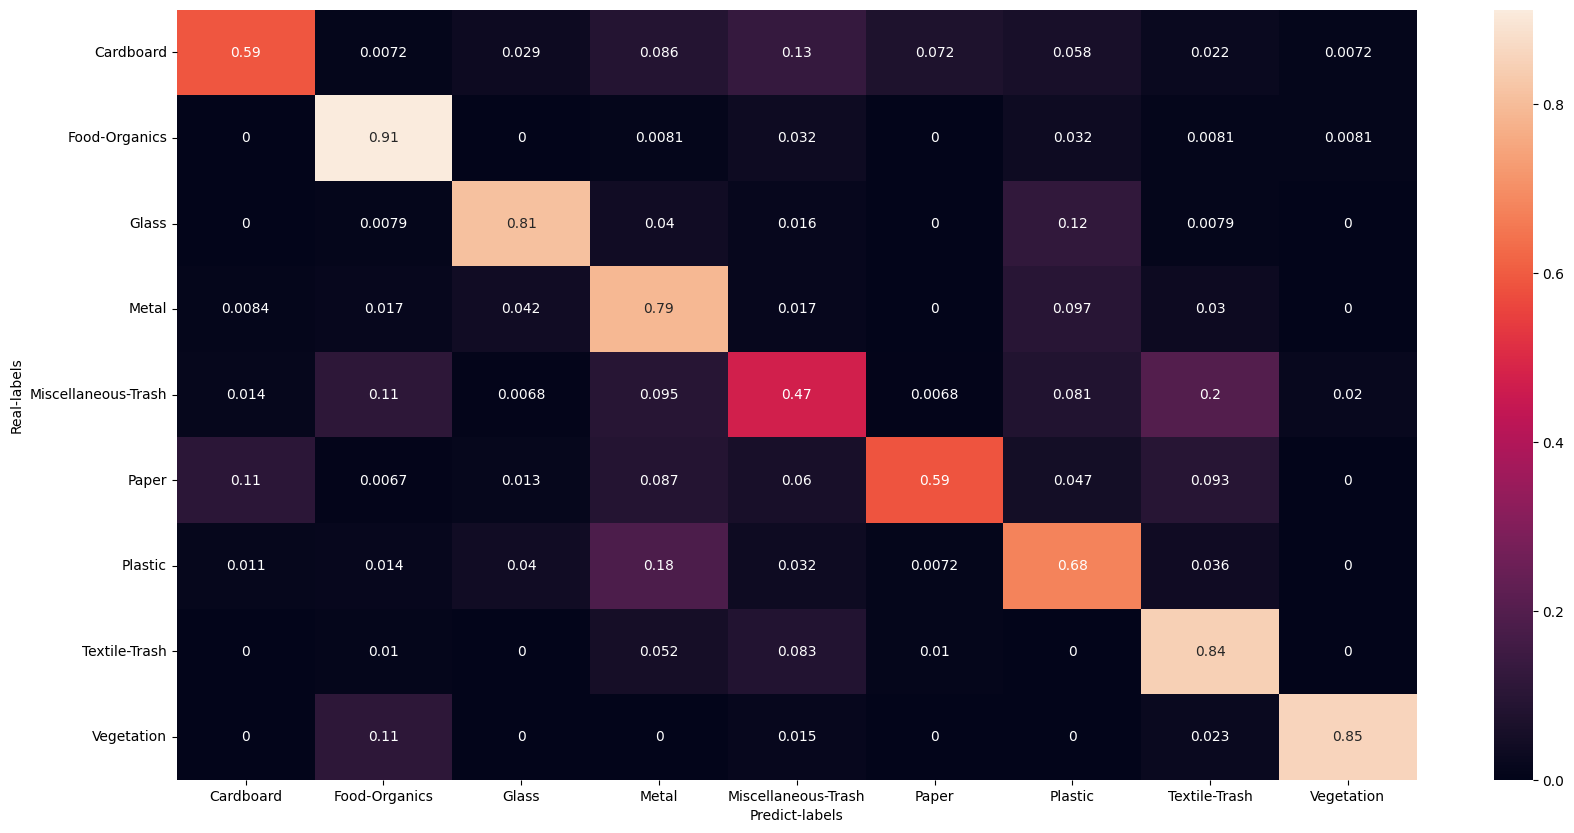

In [185]:
plt.figure(figsize=[20,10])
sns.heatmap(matrix, xticklabels=labels, yticklabels=labels, annot=True)
plt.ylabel("Real-labels")
plt.xlabel("Predict-labels")
plt.savefig("conv-mat-model_cnn3.png")